<a href="https://colab.research.google.com/github/yeyevtushenko/Neural-Networks/blob/Practical-%232/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%96_%D0%BC%D0%B5%D1%80%D0%B5%D0%B6%D1%96_%D0%91%D0%A1_25_%D0%84%D0%B2%D1%82%D1%83%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%84%D0%B3%D0%BE%D1%80_%D0%9A%D0%9F_%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практична робота №2

##Виконати завдання трьома способами: градієнтним спуском, методом Hill Climbing, генетичним алгоритмом. Проаналізувати ефективність роботи кожного з алгоритмів: отримана точність, кількість ітерацій для отримання бажаної точності, необхідні ресурси, тощо. [1, 8, 15, 22] Експоненційна функція:
##y = 3*exp(x) + noise

### Імпорт модулів

In [11]:
import numpy as np
import matplotlib.pyplot as plt

### Функція, яку аналізуємо

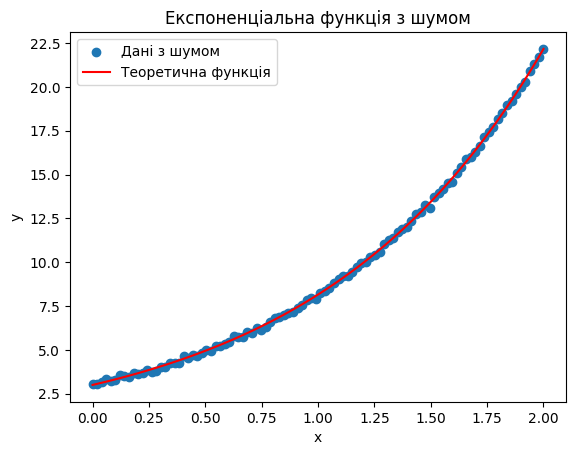

In [12]:
# Встановимо випадкове зерно для відтворюваності
np.random.seed(42)

# Згенеруємо дані
x = np.linspace(0, 2, 100)
noise = np.random.normal(0, 0.1, size=x.shape)
y = 3 * np.exp(x) + noise

# Візуалізуємо дані
plt.scatter(x, y, label='Дані з шумом')
plt.plot(x, 3 * np.exp(x), color='red', label='Теоретична функція')
plt.title('Експоненціальна функція з шумом')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Градієнтний спуск

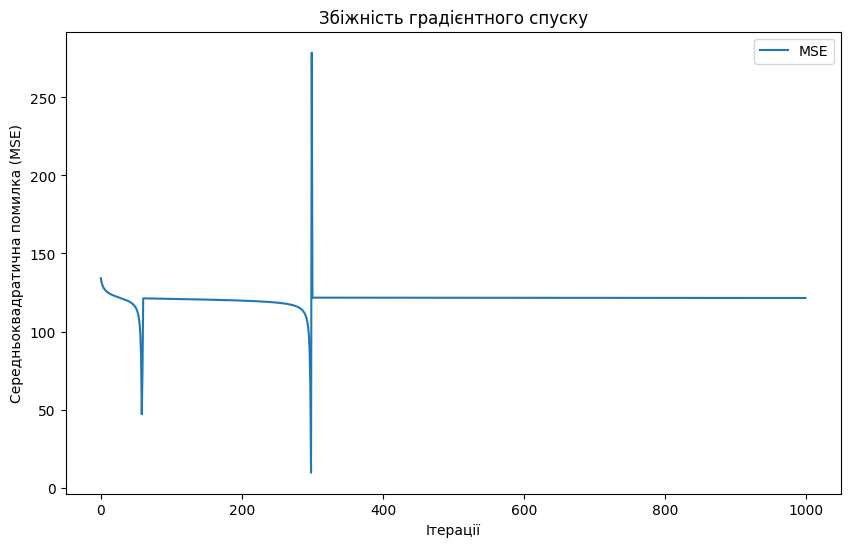

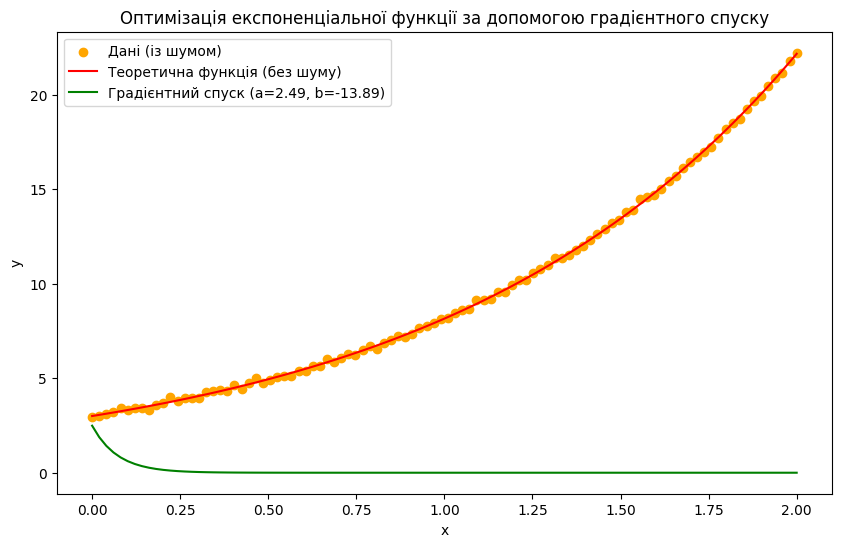

Градієнтний спуск — MSE: 121.48233383357656, Ітерації: 1000


In [13]:
# Ініціалізація параметрів
a = np.random.randn()
b = np.random.randn()
alpha = 0.01
num_iters = 1000

# Функція для обчислення градієнтів
def compute_gradients(a, b, x, y):
    y_pred = a * np.exp(b * x)
    error = y_pred - y
    grad_a = np.sum(2 * error * np.exp(b * x)) / len(x)
    grad_b = np.sum(2 * error * a * x * np.exp(b * x)) / len(x)
    return grad_a, grad_b

# Генерація даних
x = np.linspace(0, 2, 100)
noise = np.random.normal(0, 0.1, size=x.shape)
y = 3 * np.exp(x) + noise

# Основний алгорітм Градієнтного спуску
errors = []
for i in range(num_iters):
    grad_a, grad_b = compute_gradients(a, b, x, y)
    a -= alpha * grad_a
    b -= alpha * grad_b
    y_pred = a * np.exp(b * x)
    mse = np.mean((y - y_pred) ** 2)
    errors.append(mse)

# Візуалізація збіжності (MSE)
plt.figure(figsize=(10, 6))
plt.plot(errors, label="MSE")
plt.title("Збіжність градієнтного спуску")
plt.xlabel("Ітерації")
plt.ylabel("Середньоквадратична помилка (MSE)")
plt.legend()
plt.show()

# Підсумкова модель
y_pred_gd = a * np.exp(b * x)
mse_gd = np.mean((y - y_pred_gd) ** 2)

# Візуалізація
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Дані (із шумом)", color="orange")
plt.plot(x, 3 * np.exp(x), color='red', label="Теоретична функція (без шуму)")
plt.plot(x, y_pred_gd, color='green', label=f"Градієнтний спуск (a={a:.2f}, b={b:.2f})")
plt.title('Оптимізація експоненціальної функції за допомогою градієнтного спуску')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print(f"Градієнтний спуск — MSE: {mse_gd}, Ітерації: {num_iters}")

### Hill Climbing

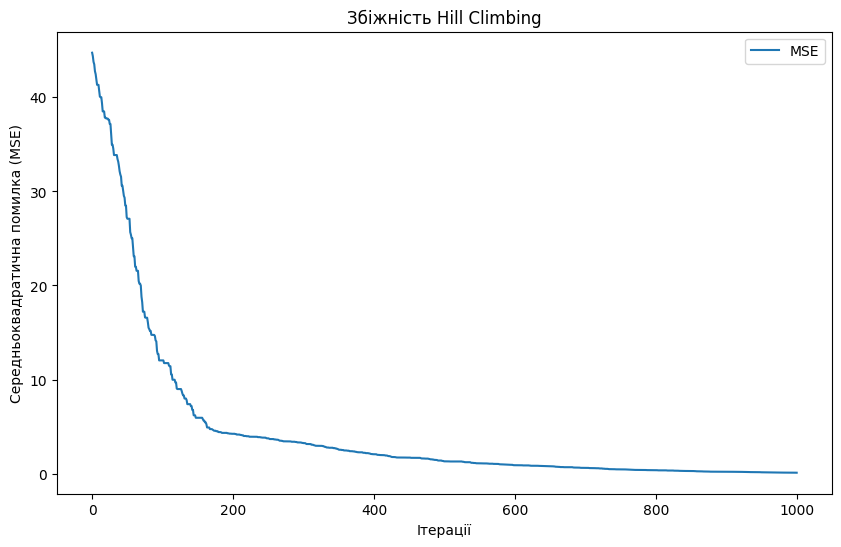

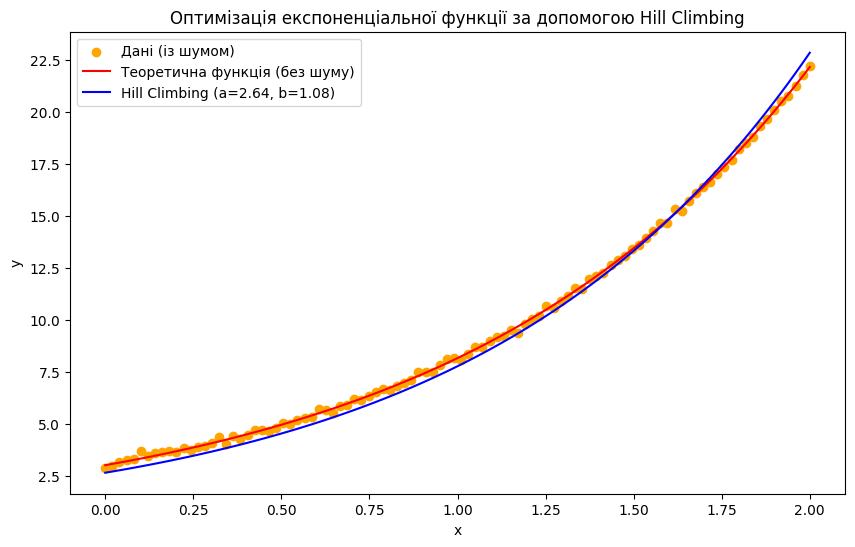

Hill Climbing — MSE: 0.1428761023394956, Ітерації: 1000


In [14]:
# Ініціалізація параметрів
a_hc, b_hc = np.random.randn(), np.random.randn()
step_size = 0.01
num_iters_hc = 1000
errors_hc = []

# Генерація даних
x = np.linspace(0, 2, 100)
noise = np.random.normal(0, 0.1, size=x.shape)
y = 3 * np.exp(x) + noise

# Функція для обчислення помилки
def compute_error(a, b, x, y):
    y_pred = a * np.exp(b * x)
    error = np.mean((y_pred - y) ** 2)
    return error

# Основний цикл Hill Climbing
for i in range(num_iters_hc):
    a_new, b_new = a_hc + np.random.uniform(-step_size, step_size), b_hc + np.random.uniform(-step_size, step_size)
    new_error = compute_error(a_new, b_new, x, y)
    current_error = compute_error(a_hc, b_hc, x, y)

    if new_error < current_error:
        a_hc, b_hc = a_new, b_new
        errors_hc.append(new_error)
    else:
        errors_hc.append(current_error)

# Візуалізація збіжності (MSE)
plt.figure(figsize=(10, 6))
plt.plot(errors_hc, label="MSE")
plt.title("Збіжність Hill Climbing")
plt.xlabel("Ітерації")
plt.ylabel("Середньоквадратична помилка (MSE)")
plt.legend()
plt.show()

# Підсумкова модель
mse_hc = compute_error(a_hc, b_hc, x, y)

# Візуалізація
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Дані (із шумом)", color="orange")
plt.plot(x, 3 * np.exp(x), color='red', label="Теоретична функція (без шуму)")
plt.plot(x, a_hc * np.exp(b_hc * x), color='blue', label=f"Hill Climbing (a={a_hc:.2f}, b={b_hc:.2f})")
plt.title('Оптимізація експоненціальної функції за допомогою Hill Climbing')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print(f"Hill Climbing — MSE: {mse_hc}, Ітерації: {num_iters_hc}")

### Генетичний алгоритм

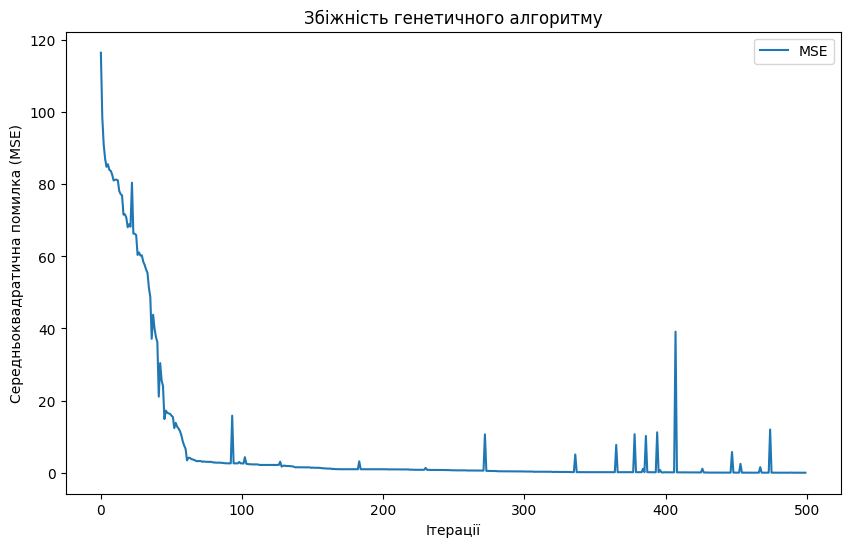

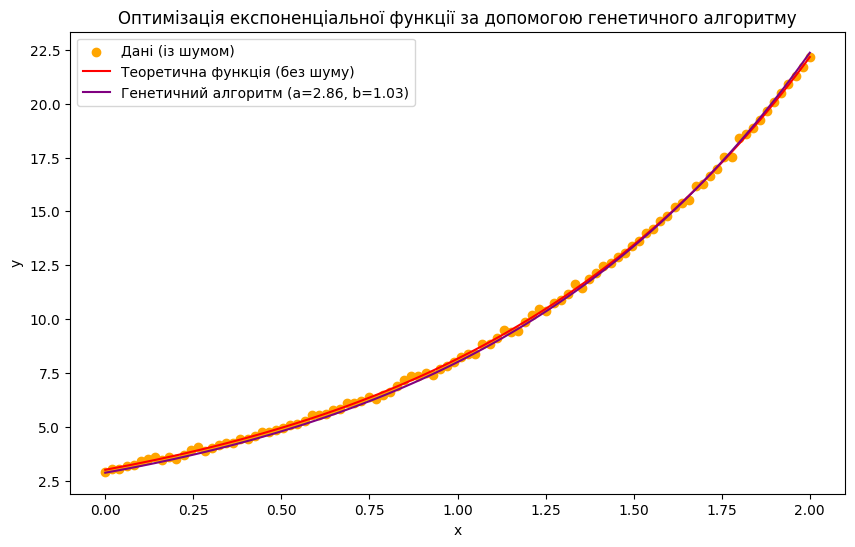

Генетичний алгоритм — MSE: 0.027238396319846654, Ітерації: 500


In [15]:
# Ініціалізація параметрів
population_size = 50
num_generations = 500
mutation_rate = 0.05

# Генерація даних
x = np.linspace(0, 2, 100)
noise = np.random.normal(0, 0.1, size=x.shape)
y = 3 * np.exp(x) + noise

# Ініціалізація популяції
population = np.random.randn(population_size, 2)

# Фітнес-функція
def fitness_function(individual, x, y):
    a, b = individual
    y_pred = a * np.exp(b * x)
    return np.mean((y_pred - y) ** 2)

errors_ga = []
# Основний цикл генетичного алгоритму
for generation in range(num_generations):
    fitness_scores = np.array([fitness_function(ind, x, y) for ind in population])

    # Вибір кращих
    best_indices = np.argsort(fitness_scores)[:population_size//2]
    best_individuals = population[best_indices]

    # Створення нового покоління
    offspring = []
    for i in range(population_size):
        parent1, parent2 = best_individuals[np.random.choice(len(best_individuals), 2)]
        child = (parent1 + parent2) / 2
        if np.random.rand() < mutation_rate:
            child += np.random.randn(2) * 0.1
        offspring.append(child)

    population = np.array(offspring)
    best_mse = fitness_function(population[np.argmin(fitness_scores)], x, y)
    errors_ga.append(best_mse)

# Візуалізація збіжності (MSE)
plt.figure(figsize=(10, 6))
plt.plot(errors_ga, label="MSE")
plt.title("Збіжність генетичного алгоритму")
plt.xlabel("Ітерації")
plt.ylabel("Середньоквадратична помилка (MSE)")
plt.legend()
plt.show()

# Вибір найкращого рішення
best_individual = population[np.argmin([fitness_function(ind, x, y) for ind in population])]
mse_ga = fitness_function(best_individual, x, y)

# Візуалізація
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Дані (із шумом)", color="orange")
plt.plot(x, 3 * np.exp(x), color='red', label="Теоретична функція (без шуму)")
plt.plot(x, best_individual[0] * np.exp(best_individual[1] * x), color='purple', label=f"Генетичний алгоритм (a={best_individual[0]:.2f}, b={best_individual[1]:.2f})")
plt.title('Оптимізація експоненціальної функції за допомогою генетичного алгоритму')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print(f"Генетичний алгоритм — MSE: {mse_ga}, Ітерації: {num_generations}")

### Висновок

Після виконання оптимізації експоненціальної функції y=3⋅exp(x)+noise трьома методами — градієнтним спуском, Hill Climbing і генетичним алгоритмом, можна зробити такі висновки:
- Генетичний алгоритм продемонстрував найкращу збіжність, досягнувши найменшого значення середньоквадратичної помилки за 500 ітерацій. Цей метод здатен уникати локальних мінімумів, що робить його ефективнішим для задач глобальної оптимізації. Однак, генетичний алгоритм потребує більше обчислювальних ресурсів і часу для кожної ітерації.
- Hill Climbing показав кращий результат MSE порівняно з градієнтним спуском MSE, що свідчить про його здатність швидше знаходити локальні мінімуми. Однак, Hill Climbing може застрягти в локальних мінімумів, що обмежує його ефективність у складних задачах із багатьма екстремумами.
- Градієнтний спуск показав найгірший результат MSE. Його основна перевага — простота реалізації та обчислювальна ефективність для гладких функцій. У цьому конкретному випадку він не зміг знайти оптимальне рішення через велику кількість локальних мінімумів.

### Відповіді на питання

1. Що таке градієнтний спуск і для чого він використовується?
Градієнтний спуск — це ітеративний метод оптимізації, який використовується для мінімізації функції втрат. Його мета — знайти параметри моделі, які мінімізують похибку між передбаченими і фактичними значеннями. Він працює шляхом обчислення градієнта функції втрат і оновлення параметрів у напрямку, протилежному градієнту, щоб зменшити значення функції.
2. Які основні складові градієнтного спуску?
Основними складовими градієнтного спуску є:
Функція втрат: Визначає, наскільки добре модель відповідає даним.
Градієнт: Напрямок, у якому функція втрат збільшується. Градієнт використовується для визначення коригування параметрів.
Швидкість навчання: Параметр, який визначає, наскільки великі зміни будуть внесені в параметри на кожному кроці ітерації.
Кількість ітерацій: Визначає, скільки разів модель буде оновлювати свої параметри.
3. Що таке швидкість навчання в контексті градієнтного спуску? Як вона впливає на процес оптимізації?
Швидкість навчання (learning rate) — це параметр, який визначає, наскільки великі кроки робитиме алгоритм градієнтного спуску при оновленні параметрів моделі. Висока швидкість навчання може призвести до пропуску мінімуму, оскільки параметри можуть змінюватися надто швидко. Низька швидкість навчання робить процес збіжності повільним, але він може бути стабільнішим.
4. Що таке метод Hill Climbing і як він відрізняється від градієнтного спуску?
Hill Climbing — це метод оптимізації, який працює за принципом поступового поліпшення рішення. На кожній ітерації вибирається нове рішення в сусідстві поточного, і якщо нове рішення покращує функцію втрат, воно стає новим поточним рішенням. Відмінність від градієнтного спуску полягає в тому, що Hill Climbing не використовує градієнти для визначення напрямку оптимізації, що робить його менш чутливим до форми функції, але вразливішим до локальних мінімумів.
5. Що таке генетичний алгоритм і в чому полягає його принцип роботи?
Генетичний алгоритм — це метод оптимізації, натхненний еволюційними процесами. Він працює шляхом створення популяції можливих рішень і застосування операцій відбору, схрещування та мутації для створення нових рішень (потомків). Найкращі індивіди з кожного покоління зберігаються, і поступово алгоритм збігається до оптимального рішення.